<a href="https://colab.research.google.com/github/Olawalebunmi/Data-Analysis/blob/main/Loan_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install chart-studio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 1.9 MB/s eta 0:00:00


In [48]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib. pyplot as plt
import seaborn as sns
import chart_studio.plotly as py
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [3]:
# import data
loan = pd.read_csv("/content/loan_data.csv")
loan.head(5)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


Exploratory Data Analysis

In [ ]:
loan.head(3)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1


In [4]:
# check the data info
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [5]:
#check the datatypes
loan.dtypes

,0
person_age,float64
person_gender,object
person_education,object
person_income,float64
person_emp_exp,int64
person_home_ownership,object
loan_amnt,float64
loan_intent,object
loan_int_rate,float64
loan_percent_income,float64


In [6]:
loan.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [ ]:
loan.head(3)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22,female,Master,71948,0,RENT,35000,PERSONAL,16.02,0.49,3.0,561,No,1
1,21,female,High School,12282,0,OWN,1000,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25,female,High School,12438,3,MORTGAGE,5500,MEDICAL,12.87,0.44,3.0,635,No,1


In [7]:
loan['person_gender'].value_counts()

,count
person_gender,
male,24841
female,20159


In [8]:
loan['person_education'].value_counts()

,count
person_education,
Bachelor,13399
Associate,12028
High School,11972
Master,6980
Doctorate,621


In [9]:
loan['person_home_ownership'].value_counts()

,count
person_home_ownership,
RENT,23443
MORTGAGE,18489
OWN,2951
OTHER,117


In [10]:
loan['previous_loan_defaults_on_file'].value_counts()

,count
previous_loan_defaults_on_file,
Yes,22858
No,22142


In [11]:
loan['loan_intent'].value_counts()

,count
loan_intent,
EDUCATION,9153
MEDICAL,8548
VENTURE,7819
PERSONAL,7552
DEBTCONSOLIDATION,7145
HOMEIMPROVEMENT,4783


In [49]:
# Count the occurrences of each home ownership type
home_ownership_count = loan['person_home_ownership'].value_counts()

# Display the result
print(home_ownership_count)

person_home_ownership
RENT        23443
MORTGAGE    18489
OWN          2951
OTHER         117
Name: count, dtype: int64


In [50]:
# convert necessary float columns to integer
loan['person_age'] = loan['person_age'].astype(int)
loan['person_income'] = loan['person_income'].astype(int)
loan['loan_amnt'] = loan['loan_amnt'].astype(int)
loan['cb_person_cred_hist_length'] = loan['cb_person_cred_hist_length'].astype(int)


print(loan)

       person_age person_gender person_education  person_income  \
0              22        female           Master          71948   
1              21        female      High School          12282   
2              25        female      High School          12438   
3              23        female         Bachelor          79753   
4              24          male           Master          66135   
...           ...           ...              ...            ...   
44995          27          male        Associate          47971   
44996          37        female        Associate          65800   
44997          33          male        Associate          56942   
44998          29          male         Bachelor          33164   
44999          24          male      High School          51609   

       person_emp_exp person_home_ownership  loan_amnt        loan_intent  \
0                   0                  RENT      35000           PERSONAL   
1                   0                   O

previous_loan_defaults_on_file
Yes    22858
No     22142
Name: count, dtype: int64


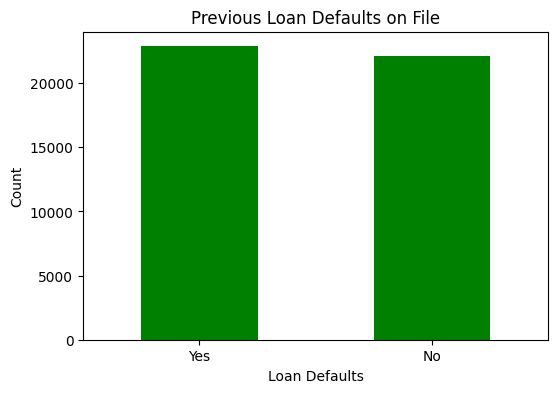

In [53]:
# Count the occurrences of each value in the previous_loan_defaults_on_file column
loan_defaults_count = loan['previous_loan_defaults_on_file'].value_counts()

# Display the result
print(loan_defaults_count)
import matplotlib.pyplot as plt

# Plot the loan defaults count
plt.figure(figsize=(6, 4))
loan_defaults_count.plot(kind='bar', color='green')
plt.title('Previous Loan Defaults on File')
plt.xlabel('Loan Defaults')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [14]:
print(loan)

       person_age person_gender person_education  person_income  \
0              22        female           Master          71948   
1              21        female      High School          12282   
2              25        female      High School          12438   
3              23        female         Bachelor          79753   
4              24          male           Master          66135   
...           ...           ...              ...            ...   
44995          27          male        Associate          47971   
44996          37        female        Associate          65800   
44997          33          male        Associate          56942   
44998          29          male         Bachelor          33164   
44999          24          male      High School          51609   

       person_emp_exp person_home_ownership  loan_amnt        loan_intent  \
0                   0                  RENT      35000           PERSONAL   
1                   0                   O

In [15]:
import plotly.express as px

# Create a bar chart
fig = px.bar(
    loan,
    x='person_gender',
    y='person_income',
    title="Gender Count by Person Income",
    labels={'person_gender': 'Gender', 'person_income': 'Income'},
    color='person_gender',  # Use different colors for Male and Female
    color_discrete_map={'Male': 'blue', 'Female': 'pink'},  # Assign custom colors

    )


# Show the chart
fig.show()

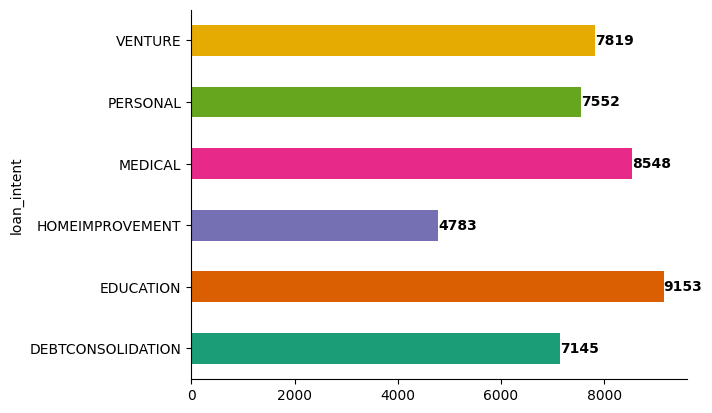

In [55]:
# @title loan_intent

# Create the horizontal bar plot
loan.groupby('loan_intent').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))

# Remove top and right spines
plt.gca().spines[['top', 'right']].set_visible(False)

# Add data labels
for index, value in enumerate(loan.groupby('loan_intent').size()):
    plt.text(value, index, str(value), va='center', ha='left', fontweight='bold', color='black')

# Display the plot
plt.show()

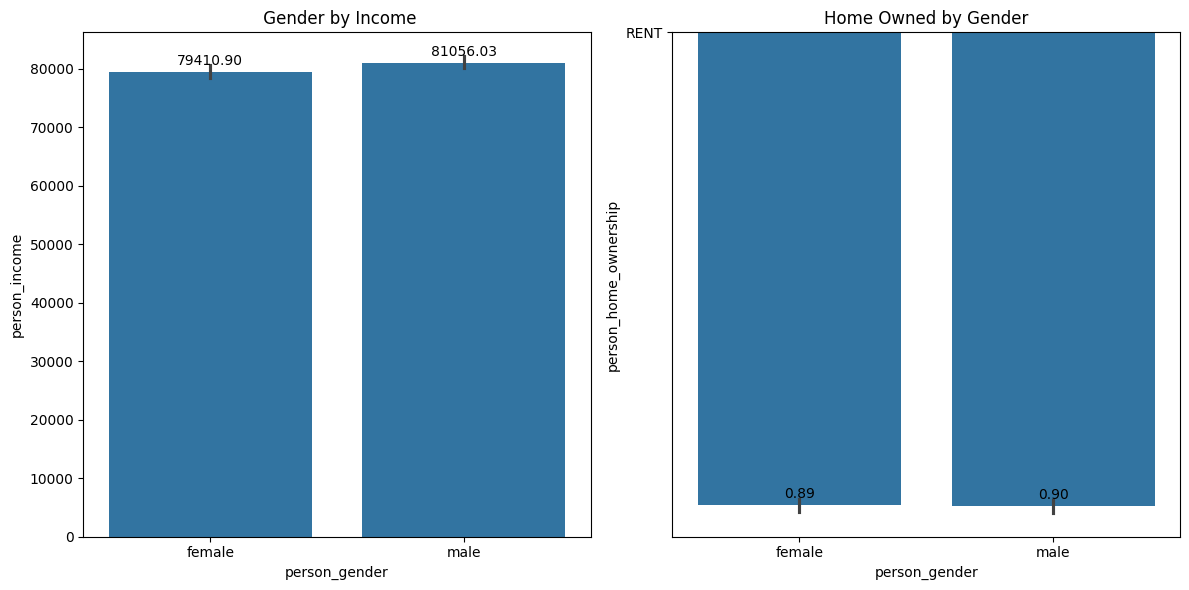

In [56]:
#visualizing
#create bar chart
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Ensure axs is a 2D array
axs = axs.flatten()

# plotting each chart in a subplot
sns.barplot(x='person_gender', y='person_income', data=loan, ax=axs[0])
axs[0].set_title(' Gender by Income')

# Add data labels for the first plot
for bar in axs[0].patches:
  axs[0].annotate(format(bar.get_height(), '.2f'),
                     (bar.get_x() + bar.get_width() / 2., bar.get_height()),
                     ha='center', va='center',
                     xytext=(0, 8),
                     textcoords='offset points')


sns.barplot(x='person_gender', y='person_home_ownership', data=loan, ax=axs[1])
axs[1].set_title('Home Owned by Gender')

# Add data labels for the second plot
for bar in axs[1].patches:
  axs[1].annotate(format(bar.get_height(), '.2f'),
                     (bar.get_x() + bar.get_width() / 2., bar.get_height()),
                     ha='center', va='center',
                     xytext=(0, 8),
                     textcoords='offset points')


# Adjust layout plt.tight_layout()
plt.tight_layout()


# Show the plot
plt.show()


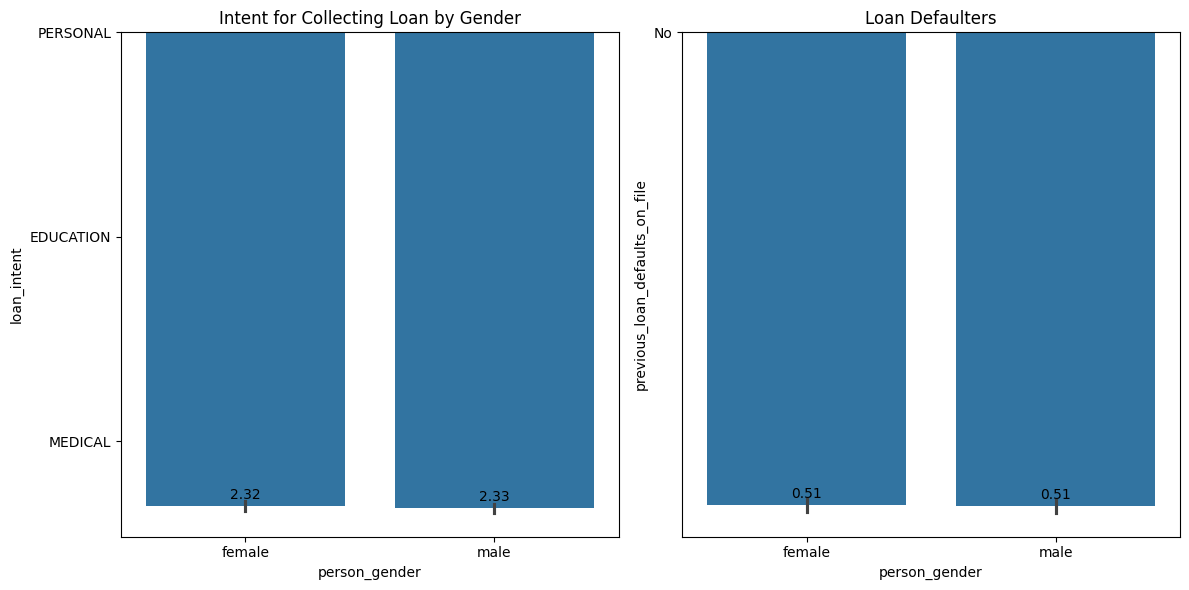

In [17]:
#visualizing
#create bar chart
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Ensure axs is a 2D array
axs = axs.flatten()

sns.barplot(x='person_gender', y='loan_intent', data=loan, ax=axs[0])
axs[0].set_title('Intent for Collecting Loan by Gender')

# Add data labels for the third plot
for bar in axs[0].patches:
  axs[0].annotate(format(bar.get_height(), '.2f'),
                     (bar.get_x() + bar.get_width() / 2., bar.get_height()),
                     ha='center', va='center',
                     xytext=(0, 8),
                     textcoords='offset points')

sns.barplot(x='person_gender', y='previous_loan_defaults_on_file', data=loan, ax=axs[1])
axs[1].set_title('Loan Defaulters')

# Add data labels for the first plot
for bar in axs[1].patches:
  axs[1].annotate(format(bar.get_height(), '.2f'),
                     (bar.get_x() + bar.get_width() / 2., bar.get_height()),
                     ha='center', va='center',
                     xytext=(0, 8),
                     textcoords='offset points')

# Adjust layout plt.tight_layout()
plt.tight_layout()


# Show the plot
plt.show()

In [ ]:
loan.head(3)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22,female,Master,71948,0,RENT,35000,PERSONAL,16.02,0.49,3,561,No,1
1,21,female,High School,12282,0,OWN,1000,EDUCATION,11.14,0.08,2,504,Yes,0
2,25,female,High School,12438,3,MORTGAGE,5500,MEDICAL,12.87,0.44,3,635,No,1


In [57]:
#Extracting unique values on their counts for categorical columns

categorical_columns = [
    "person_gender", "person_education", "person_income", "person_home_ownership", "loan_intent", "previous_loan_defaults_on_file"
    ]


# Dictionary to store unique value counts
categorical_values_counts ={}
for column in categorical_columns:
  if column in loan.columns:
      categorical_values_counts[column] = loan[column].value_counts()
  else:
    print(f"column {column} not found in the Dataframe")

print(categorical_values_counts)

{'person_gender': person_gender
male      24841
female    20159
Name: count, dtype: int64, 'person_education': person_education
Bachelor       13399
Associate      12028
High School    11972
Master          6980
Doctorate        621
Name: count, dtype: int64, 'person_income': person_income
8000      15
73011     10
36995      9
60914      8
37020      8
          ..
259923     1
40186      1
69485      1
50351      1
33164      1
Name: count, Length: 33989, dtype: int64, 'person_home_ownership': person_home_ownership
RENT        23443
MORTGAGE    18489
OWN          2951
OTHER         117
Name: count, dtype: int64, 'loan_intent': loan_intent
EDUCATION            9153
MEDICAL              8548
VENTURE              7819
PERSONAL             7552
DEBTCONSOLIDATION    7145
HOMEIMPROVEMENT      4783
Name: count, dtype: int64, 'previous_loan_defaults_on_file': previous_loan_defaults_on_file
Yes    22858
No     22142
Name: count, dtype: int64}


In [58]:
# change categorical columns to numerical
label_encoder = LabelEncoder()
loan['person_gender'] = label_encoder.fit_transform(loan['person_gender'])
loan['person_education'] = label_encoder.fit_transform(loan['person_education'])
loan['person_home_ownership'] = label_encoder.fit_transform(loan['person_home_ownership'])
loan['loan_intent'] = label_encoder.fit_transform(loan['loan_intent'])
loan['previous_loan_defaults_on_file'] = label_encoder.fit_transform(loan['previous_loan_defaults_on_file'])


print(loan)


       person_age  person_gender  person_education  person_income  \
0              22              0                 4          71948   
1              21              0                 3          12282   
2              25              0                 3          12438   
3              23              0                 1          79753   
4              24              1                 4          66135   
...           ...            ...               ...            ...   
44995          27              1                 0          47971   
44996          37              0                 0          65800   
44997          33              1                 0          56942   
44998          29              1                 1          33164   
44999          24              1                 3          51609   

       person_emp_exp  person_home_ownership  loan_amnt  loan_intent  \
0                   0                      3      35000            4   
1                   0      

In [ ]:
loan.head(3)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22,0,4,71948,0,3,35000,4,16.02,0.49,3,561,0,1
1,21,0,3,12282,0,2,1000,1,11.14,0.08,2,504,1,0
2,25,0,3,12438,3,0,5500,3,12.87,0.44,3,635,0,1


In [ ]:
loan.head(3)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22,0,4,71948,0,3,35000,4,16.02,0.49,3,561,No,1
1,21,0,3,12282,0,2,1000,1,11.14,0.08,2,504,Yes,0
2,25,0,3,12438,3,0,5500,3,12.87,0.44,3,635,No,1


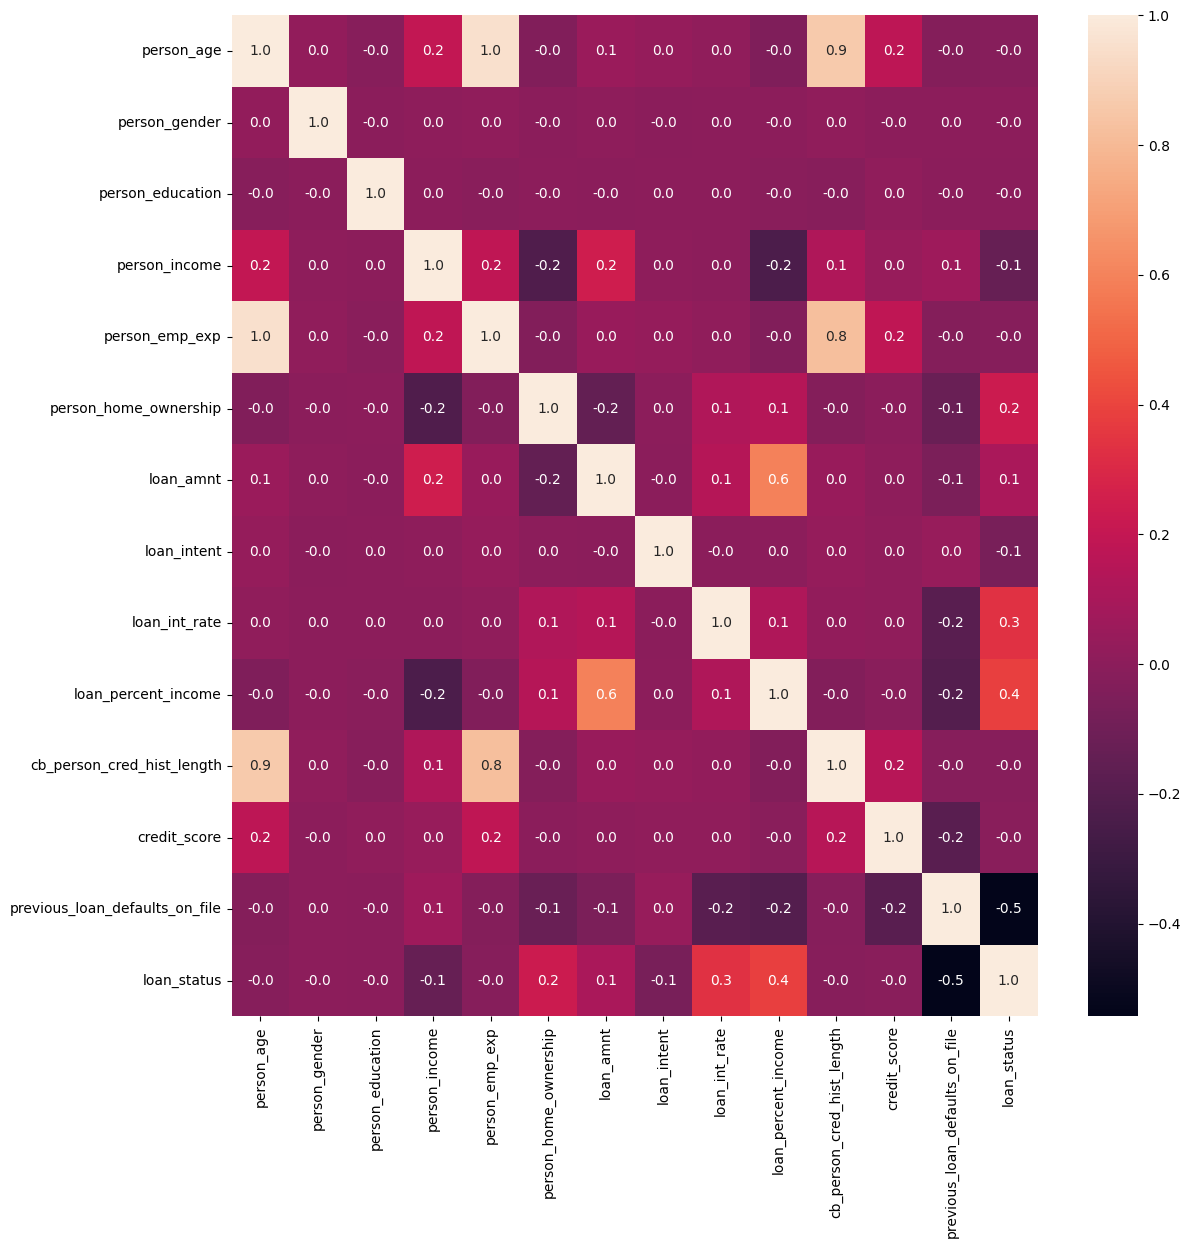

In [42]:
loan = loan.corr()
fig, ax = plt.subplots(figsize=(13, 13))
sns.heatmap(loan, annot=True, fmt='.1f', ax=ax)
plt.show()

In [59]:
# Encoding categorical variables using one-hot encoding
loan_encoded = pd.get_dummies(loan, drop_first=True)

# Checking the updated dataset
loan_encoded.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22,0,4,71948,0,3,35000,4,16.02,0.49,3,561,0,1
1,21,0,3,12282,0,2,1000,1,11.14,0.08,2,504,1,0
2,25,0,3,12438,3,0,5500,3,12.87,0.44,3,635,0,1
3,23,0,1,79753,0,3,35000,3,15.23,0.44,2,675,0,1
4,24,1,4,66135,1,3,35000,3,14.27,0.53,4,586,0,1


In [60]:
from sklearn.model_selection import train_test_split

# Features and target variable
X = loan_encoded.drop ('loan_status', axis=1)
y = loan_encoded ['loan_status']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Model choice: Random Forest or Logistic Regression
model = RandomForestClassifier(random_state=42)
# model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

accuracy, precision, recall, conf_matrix

(0.9286666666666666,
 0.8899657924743444,
 0.7766169154228856,
 array([[6797,  193],
        [ 449, 1561]]))

In [62]:
# Printing out the performance metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy: 0.9286666666666666
Precision: 0.8899657924743444
Recall: 0.7766169154228856
Confusion Matrix:
[[6797  193]
 [ 449 1561]]


In [63]:
#Authenticate with GitHub
!git config --global user.name "Olawalebunmi"
!git config --global user.email "oluwabunmiadekoya5@gmail.com"

In [64]:
#Clone Your Repository Clone the repository to Colab:
!git clone https://github.com/Olawalebunmi/Loan-Analysis.git

Cloning into 'Loan-Analysis'...


In [ ]:
#Move code to repository
!mv Loan-Analysis/content/loan_data.csv/* ./

In [67]:
# Commit and push changes
%cd repository
!git add .
!git commit -m "Added my code from Google Colab"
!git push origin main

[Errno 2] No such file or directory: 'repository'
/content
fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
